# Model Selection 

- $r^2$
- Adjusted $r^2$
- AIC
- BIC

## Linear Regression Example

Which model is better if number of parameters differ?

In [ ]:
#!pip install sympy

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Coefficient of Determination

- Regression Sum of Squares $SSR = \sum(\hat{y_i} - \bar{y})^2$

- Error Sum of Squares $SSE = \sum(y_i - \hat{y_i})^2$

- Total Sum of Squares $SSTO = \sum(y_i - \bar{y})^2$

$$r^2 = \frac{SSR}{SSTO} = 1 - \frac{SSE}{SSTO}$$

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
bdf = pd.DataFrame(X, columns=boston.feature_names)
bdf['target'] = y

In [3]:
#the boston data
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#split, fit, score
def lin_reg_fitter(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    lr = LinearRegression()

    lr.fit(X_train, y_train)
    
    return lr.score(X_train, y_train)  

In [5]:
#create lists of scores
cols = []
scores = []
for col in boston.feature_names:
    cols.append(col)
    score = lin_reg_fitter(bdf[cols], bdf['target'])
    scores.append(score)

In [7]:
pd.DataFrame({'num_features': [i for i in range(len(boston.feature_names))], 'r2': scores})

,num_features,r2
0,0,0.127099
1,1,0.232623
2,2,0.296325
3,3,0.287025
4,4,0.327869
5,5,0.634975
6,6,0.579400
7,7,0.658150
8,8,0.644919
9,9,0.641160


<AxesSubplot:>

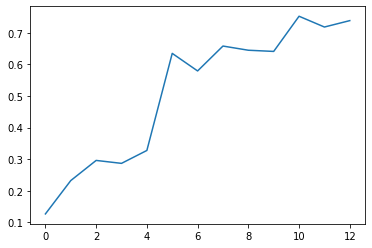

In [9]:
pd.DataFrame({'num_features': [i for i in range(len(boston.feature_names))], 'r2': scores})['r2'].plot()

### Adjusted $r^2$

Adjust the $SSE$ and $SSTO$ by degrees of freedom.

$$r^2_a = 1 - \frac{SSE/(n-p)}{SSTO/(n-1)} = 1 - \frac{MSE}{MSTO}$$

$$r^2_a = r^2 - ( \frac{p-1}{n-p}) (1 - r^2)$$

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [11]:
import statsmodels.api as sm

In [12]:
model = sm.OLS(y, X).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 28 Sep 2020   Prob (F-statistic):                        0.00
Time:                        20:11:43   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.007      -0.161      -0.025
x2             0.0487      0.014      3.382      0.001       0.020       0.077
x3            -0.0041      0.064     -0.063      0.950      -0.131       0.123
x4             2.8540      0.904      3.157      0.002       1.078       4.630
x5            -2.8684      3.359     -0.854      0.394      -9.468       3.731
x6             5.9281      0.309     19.178      0.000       5.321       6.535
x7            -0.0073      0.014     -0.526      0.599      -0.034       0.020
x8            -0.9685      0.196     -4.951      0.000      -1.353      -0.584
x9             0.1712      0.067      2.564      0.011       0.040       0.302
x10           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
x11           -0.3922      0.110     -3.570      0.000      -0.608      -0.176
x12            0.0149      0.003      5.528      0.000       0.010       0.020
x13           -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Generic Information Criteria

$$xIC = -2ln(L) + complexity ~term$$

$L$ is maximized likelihood.

### Akaike Information Criterion

$$AIC = -2 ln(L) + 2p$$

$$AIC = n \ln(SSE_p/n) + 2p$$

### Bayesian Information Criterion

$$BIC = -2 ln(L) + p ln(n)$$

$$BIC = n\ln(SSE_p/n) + p \ln(n)$$

Penalizes more complex more ($n \geq 8$).

### Comparison

$$r^2_a \quad \text{or}\quad  AIC \quad \text{or} \quad BIC$$

## Statsmodels

In [14]:
import statsmodels.api as sm

In [15]:
lr = sm.OLS(boston.target, bdf['CHAS'] + bdf['INDUS'])

In [16]:
results = lr.fit()

In [17]:
print(lr.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.484
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              472.8
Date:                Mon, 28 Sep 2020   Prob (F-statistic):                    1.79e-74
Time:                        20:20:08   Log-Likelihood:                         -2165.9
No. Observations:                 506   AIC:                                      4334.
Df Residuals:                     505   BIC:                                      4338.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
results.rsquared_adj

0.48250294963067675

In [19]:
results.rsquared

0.4835256710740944

In [20]:
results.aic

4333.816486617374

In [21]:
results.bic

4338.043023286661

<AxesSubplot:>

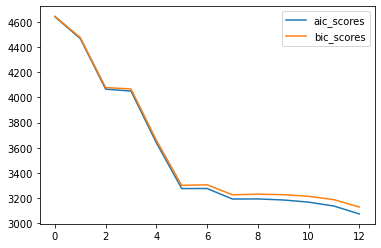

In [27]:
#create lists of scores

def sm_reg_fitter(X, y):
    model = sm.OLS(y, X).fit()
    return model.aic

def sm_reg_fitterb(X, y):
    model = sm.OLS(y, X).fit()
    return model.bic

cols = []
scores = []
bic_scores = []

for col in boston.feature_names:
    cols.append(col)
    score = sm_reg_fitter(bdf[cols], bdf['target'])
    scores.append(score)
    s2 = sm_reg_fitterb(bdf[cols], bdf['target'])
    bic_scores.append(s2)

pd.DataFrame({'ncols': [i[0] for i in enumerate(cols)],
             'aic_scores': scores,
             'bic_scores': bic_scores})[['aic_scores', 'bic_scores']].plot()

### Logistic Regression

In [28]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MaxAbsScaler

In [29]:
iris = load_iris()

In [30]:
X = iris.data
y = iris.target

In [31]:
ss = MaxAbsScaler()
X = ss.fit_transform(X)
y = ss.fit_transform(y.reshape(-1,1))

In [32]:
iris_df = pd.DataFrame(X, columns = iris.feature_names)

In [34]:
model = sm.Logit(y, iris_df['sepal length (cm)'])

In [35]:
model.fit()

Optimization terminated successfully.
         Current function value: 0.687787
         Iterations 4


In [36]:
model.fit().summary2()

Optimization terminated successfully.
         Current function value: 0.687787
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: y                AIC:              208.3360
Date:               2020-09-28 20:28 BIC:              211.3466
No. Observations:   150              Log-Likelihood:   -103.17 
Df Model:           0                LL-Null:          -103.97 
Df Residuals:       149              LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
---------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
sepal length (cm)  0.2399   0.2196 1.0928 0.2745 -0.1904 0.6703
===============================================================

"""

In [40]:
model = sm.Logit( y, iris_df[['sepal length (cm)','petal length (cm)']])

In [41]:
model.fit()

Optimization terminated successfully.
         Current function value: 0.258961
         Iterations 8


In [43]:
import seaborn as sns

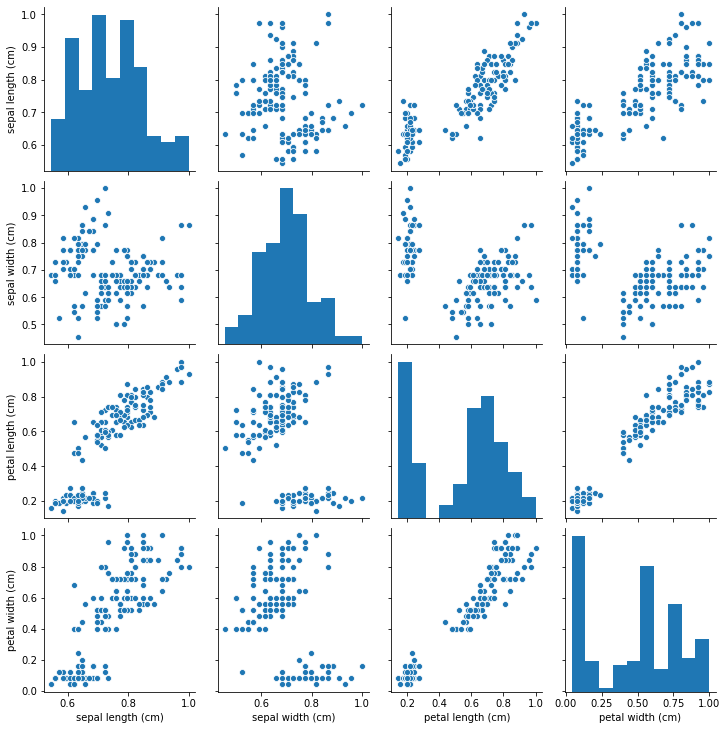

In [45]:
sns.pairplot(iris_df)

In [42]:
model.fit().summary2()

Optimization terminated successfully.
         Current function value: 0.258961
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.626     
Dependent Variable:   y                AIC:              81.6883   
Date:                 2020-09-28 20:29 BIC:              87.7095   
No. Observations:     150              Log-Likelihood:   -38.844   
Df Model:             1                LL-Null:          -103.97   
Df Residuals:         148              LLR p-value:      3.6021e-30
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
sepal length (cm) -15.6427   3.3842 -4.6223 0.0000 -22.2757 -9.0098
petal length (cm)  19.6605   3.9987  4.9167 0.0000  11.8231 27.4978
===================================================================

"""

### KMeans Clustering

In [46]:
#https://stats.stackexchange.com/questions/90769/using-bic-to-estimate-the-number-of-k-in-kmeans

from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

<BarContainer object of 9 artists>

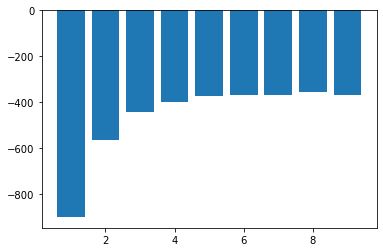

In [47]:
# IRIS DATA
iris = sklearn.datasets.load_iris()
X = iris.data[:, :4]  # extract only the features
#Xs = StandardScaler().fit_transform(X)
Y = iris.target

ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]

plt.bar(ks, BIC)

### Gaussian Mixture Models

In [48]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

In [49]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

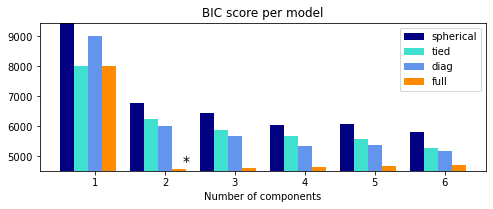

In [50]:
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

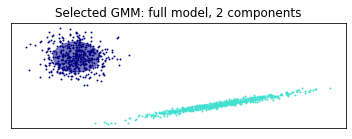

In [51]:
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

# Association Rules and Apriori Algorithm

- The *apriori* algorithm



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Mining Association Rules

![](images/basket.png)

## Formal Statement of Problem

A set of *items*

- $I = {i_1, i_2, ..., i_m}$

A set of *transactions*

- $D$ where each transaction $T$ is a set of items such that $T \subset I$

A unique identifier for transactions.

- $TID$


### EXAMPLE

We have information on 60 customers.

- 10 transactions contain milk
- 20 transactions contain beer
- 30 transactions contain diapers
- 15 transactions that contain diapers also contain beer
- 5 transactions that contain diapers also contain milk

### Support

Think proportion of item.

```
Support(diaper) = (Transactions with (diaper) ) / (Total Transactions)
```

### Confidence

Likelihood item B is bought when item A is bought.  

```
Confidence(A -> B) = (Transactions(A and B))/(Transactions with A)
```


### Lift

The increase in ratio of sale of B when A is sold.

```
Lift(A -> B) = (Confidence(A -> B)/ Support(B))
```


In [52]:
support_diaper = 30/60

In [53]:
confidence_beer_diapers = 15/20
confidence_milk_diapers = 5/30

In [54]:
lift_beer_diaper = confidence_beer_diapers/support_diaper
lift_milk_diaper = confidence_milk_diapers/support_diaper

In [55]:
lift_beer_diaper

1.5

In [56]:
lift_milk_diaper

0.3333333333333333

In [57]:
for lift in [lift_beer_diaper, lift_milk_diaper]:
    if lift == 1:
        print('No Association')
    elif lift < 1: 
        print('Not likely to be bought together')
    elif lift > 1:
        print('These are likely')

These are likely
Not likely to be bought together


### Implementation

- Restrict support and confidence values.
- Extract subsets larger than threshold
- Determine Confidence and select items
- Order the rules by descending order of lift

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('data/store_data.csv')

In [60]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.columns

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [62]:
#!pip install apyori
from apyori import apriori

In [63]:
records = []
for i in range(df.shape[0]):
    records.append([str(df.values[i, j]) for j in range(0, df.shape[1])])

In [64]:
len(records)

7500

In [65]:
records[0]

['burgers',
 'meatballs',
 'eggs',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [66]:
records[-1]

['eggs',
 'frozen smoothie',
 'yogurt cake',
 'low fat yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [67]:
association_rules = apriori(records, min_support = 0.0045, min_confidence=0.2, min_lift=3, min_length = 3)
results = list(association_rules)

In [68]:
results[0]

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])

In [69]:
for result in results[:10]:
    items = result[0]
    items = [x for x in items]
    print('Rule: ' + items[0] + '  --> ' + items[1])
    print('Support {:.4f}'.format(result[1]))
    print('Confidence {:.4f}'.format(float(result[2][0][2])))
    print('Lift {:.4f}'.format(result[2][0][3]))
    print('============\n')

Rule: light cream  --> chicken
Support 0.0045
Confidence 0.2906
Lift 4.8433

Rule: escalope  --> mushroom cream sauce
Support 0.0057
Confidence 0.3007
Lift 3.7903

Rule: pasta  --> escalope
Support 0.0059
Confidence 0.3729
Lift 4.7002

Rule: ground beef  --> herb & pepper
Support 0.0160
Confidence 0.3235
Lift 3.2916

Rule: ground beef  --> tomato sauce
Support 0.0053
Confidence 0.3774
Lift 3.8401

Rule: olive oil  --> whole wheat pasta
Support 0.0080
Confidence 0.2715
Lift 4.1302

Rule: pasta  --> shrimp
Support 0.0051
Confidence 0.3220
Lift 4.5145

Rule: light cream  --> nan
Support 0.0045
Confidence 0.2906
Lift 4.8433

Rule: frozen vegetables  --> chocolate
Support 0.0053
Confidence 0.2326
Lift 3.2602

Rule: ground beef  --> spaghetti
Support 0.0048
Confidence 0.5714
Lift 3.2816

